In [5]:
import torch
from torch import optim

# Data Initialization
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

# Model Definition
def model(t_u, params):
    w2, w1, b = params
    return w2 * t_u ** 2 + w1 * t_u + b

# Loss Function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

# Data Splitting and Normalization
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

# Training Loop
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, params)
        train_loss = loss_fn(train_t_p, train_t_c)

        with torch.no_grad():
            val_t_p = model(val_t_u, params)
            val_loss = loss_fn(val_t_p, val_t_c)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Training loss {train_loss.item():.4f}, Validation loss {val_loss.item():.4f}')

    return params

# Function to run training with different learning rates
def run_training_with_learning_rate(learning_rate):
    print(f"\nTraining with learning rate: {learning_rate}")
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)  # Initialize w2, w1, and b
    optimizer = optim.SGD([params], lr=learning_rate)

    # Training the Model
    params = training_loop(
        n_epochs = 5000,
        optimizer = optimizer,
        params = params,
        train_t_u = train_t_un,
        val_t_u = val_t_un,
        train_t_c = train_t_c,
        val_t_c = val_t_c
    )

# Exploring different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
for lr in learning_rates:
    run_training_with_learning_rate(lr)



Training with learning rate: 0.1
Epoch 500, Training loss nan, Validation loss nan
Epoch 1000, Training loss nan, Validation loss nan
Epoch 1500, Training loss nan, Validation loss nan
Epoch 2000, Training loss nan, Validation loss nan
Epoch 2500, Training loss nan, Validation loss nan
Epoch 3000, Training loss nan, Validation loss nan
Epoch 3500, Training loss nan, Validation loss nan
Epoch 4000, Training loss nan, Validation loss nan
Epoch 4500, Training loss nan, Validation loss nan
Epoch 5000, Training loss nan, Validation loss nan

Training with learning rate: 0.01
Epoch 500, Training loss nan, Validation loss nan
Epoch 1000, Training loss nan, Validation loss nan
Epoch 1500, Training loss nan, Validation loss nan
Epoch 2000, Training loss nan, Validation loss nan
Epoch 2500, Training loss nan, Validation loss nan
Epoch 3000, Training loss nan, Validation loss nan
Epoch 3500, Training loss nan, Validation loss nan
Epoch 4000, Training loss nan, Validation loss nan
Epoch 4500, Tra

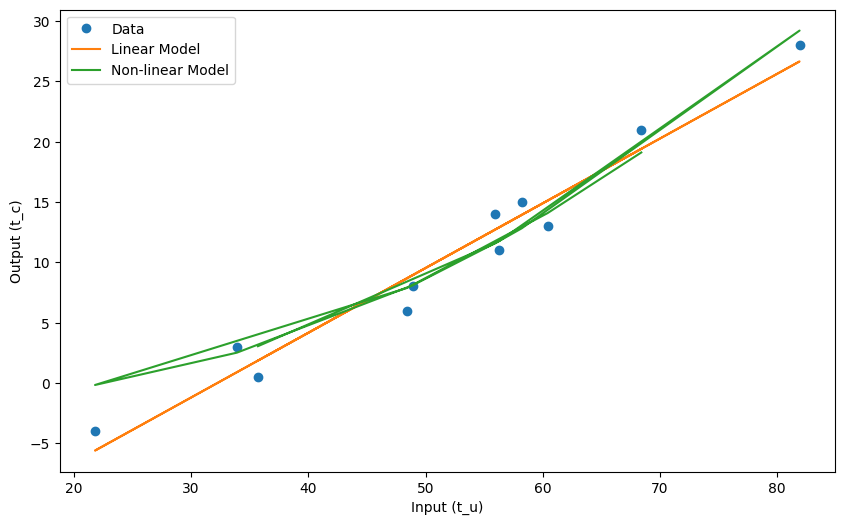

Final Linear Model Loss: 2.9276480674743652
Final Non-linear Model Loss: 3.8615105152130127


In [6]:
import torch
from torch import optim
import matplotlib.pyplot as plt

# Data Initialization
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

# Normalizing input data
t_un = 0.1 * t_u

# Linear Model Definition (as in the lecture)
def linear_model(t_u, w, b):
    return w * t_u + b

# Training Loop for Linear Model
def train_linear_model(n_epochs, learning_rate, train_t_u, train_t_c):
    params = torch.tensor([1.0, 0.0], requires_grad=True)
    optimizer = optim.SGD([params], lr=learning_rate)
    for epoch in range(1, n_epochs + 1):
        t_p = linear_model(train_t_u, *params)
        loss = loss_fn(t_p, train_t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return params

# Non-linear Model Definition
def nonlinear_model(t_u, params):
    w2, w1, b = params
    return w2 * t_u ** 2 + w1 * t_u + b

# Loss Function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

# Training Non-linear Model (best from previous results)
def train_nonlinear_model(n_epochs, learning_rate, train_t_u, train_t_c):
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.SGD([params], lr=learning_rate)
    for epoch in range(1, n_epochs + 1):
        t_p = nonlinear_model(train_t_u, params)
        loss = loss_fn(t_p, train_t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return params

# Train both models
linear_params = train_linear_model(n_epochs=5000, learning_rate=1e-2, train_t_u=t_un, train_t_c=t_c)
nonlinear_params = train_nonlinear_model(n_epochs=5000, learning_rate=1e-4, train_t_u=t_un, train_t_c=t_c)

# Generate predictions
t_p_linear = linear_model(t_un, *linear_params)
t_p_nonlinear = nonlinear_model(t_un, nonlinear_params)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label='Data')
plt.plot(t_u.numpy(), t_p_linear.detach().numpy(), label='Linear Model')
plt.plot(t_u.numpy(), t_p_nonlinear.detach().numpy(), label='Non-linear Model')
plt.xlabel('Input (t_u)')
plt.ylabel('Output (t_c)')
plt.legend()
plt.show()

# Print final losses for comparison
final_linear_loss = loss_fn(t_p_linear, t_c).item()
final_nonlinear_loss = loss_fn(t_p_nonlinear, t_c).item()
print(f"Final Linear Model Loss: {final_linear_loss}")
print(f"Final Non-linear Model Loss: {final_nonlinear_loss}")



Training with learning rate: 0.1
Epoch [500/5000], Training Loss: 0.0122, Validation Loss: 0.0208
Epoch [1000/5000], Training Loss: 0.0122, Validation Loss: 0.0208
Epoch [1500/5000], Training Loss: 0.0122, Validation Loss: 0.0208
Epoch [2000/5000], Training Loss: 0.0122, Validation Loss: 0.0208
Epoch [2500/5000], Training Loss: 0.0122, Validation Loss: 0.0208
Epoch [3000/5000], Training Loss: 0.0122, Validation Loss: 0.0208
Epoch [3500/5000], Training Loss: 0.0122, Validation Loss: 0.0208
Epoch [4000/5000], Training Loss: 0.0122, Validation Loss: 0.0208
Epoch [4500/5000], Training Loss: 0.0122, Validation Loss: 0.0208
Epoch [5000/5000], Training Loss: 0.0122, Validation Loss: 0.0208

Training with learning rate: 0.01
Epoch [500/5000], Training Loss: 0.0122, Validation Loss: 0.0208
Epoch [1000/5000], Training Loss: 0.0122, Validation Loss: 0.0208
Epoch [1500/5000], Training Loss: 0.0122, Validation Loss: 0.0208
Epoch [2000/5000], Training Loss: 0.0122, Validation Loss: 0.0208
Epoch [25

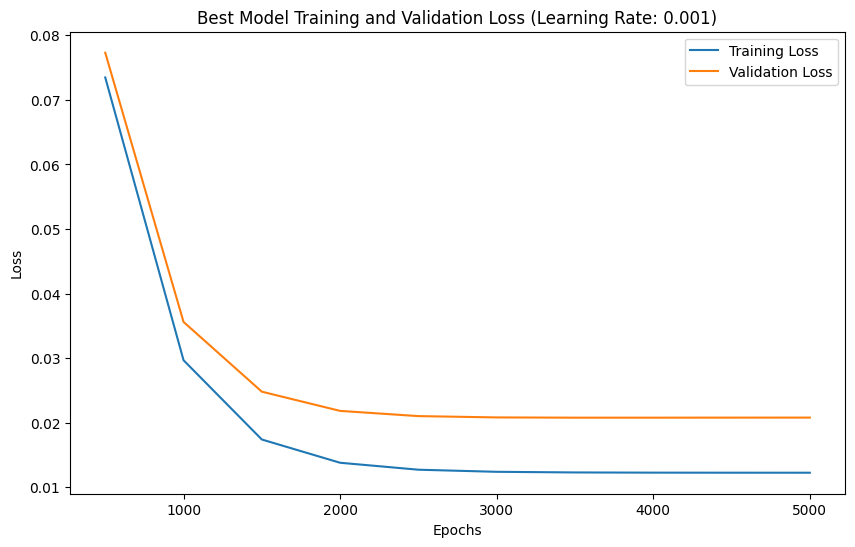

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
from torch import optim
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Housing.csv')

# Select the relevant columns for the model
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'
X = df[features].values
y = df[target].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Scale the target variable
target_scaler = MinMaxScaler()
y_train = target_scaler.fit_transform(y_train.reshape(-1, 1))
y_val = target_scaler.transform(y_val.reshape(-1, 1))

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Define the linear regression model
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# Training loop
def train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, n_epochs=5000):
    training_losses = []
    validation_losses = []
    for epoch in range(n_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        if (epoch+1) % 500 == 0:
            model.eval()
            with torch.no_grad():
                val_outputs = model(X_val)
                val_loss = criterion(val_outputs, y_val)
            training_losses.append(loss.item())
            validation_losses.append(val_loss.item())
            print(f'Epoch [{epoch+1}/{n_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')
    return training_losses, validation_losses

# Function to run training with different learning rates
def run_training_with_learning_rate(learning_rate):
    print(f"\nTraining with learning rate: {learning_rate}")
    model = LinearRegressionModel(input_dim)
    criterion = torch.nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    training_losses, validation_losses = train_model(model, criterion, optimizer, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, n_epochs=5000)
    return model, training_losses, validation_losses

# Exploring different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
models_losses = {}

for lr in learning_rates:
    model, training_losses, validation_losses = run_training_with_learning_rate(lr)
    models_losses[lr] = (model, training_losses, validation_losses)

# Identify the best model based on validation loss
best_lr = min(learning_rates, key=lambda lr: models_losses[lr][2][-1])
best_model, best_training_losses, best_validation_losses = models_losses[best_lr]

print(f"\nBest learning rate: {best_lr}")

# Plot the results for the best model
epochs = range(500, 5001, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, best_training_losses, label='Training Loss')
plt.plot(epochs, best_validation_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Best Model Training and Validation Loss (Learning Rate: {best_lr})')
plt.legend()
plt.show()



Training with learning rate: 0.1
Epoch [500/5000], Training Loss: 0.3141, Validation Loss: 0.5690
Epoch [1000/5000], Training Loss: 0.3141, Validation Loss: 0.5690
Epoch [1500/5000], Training Loss: 0.3141, Validation Loss: 0.5690
Epoch [2000/5000], Training Loss: 0.3141, Validation Loss: 0.5690
Epoch [2500/5000], Training Loss: 0.3141, Validation Loss: 0.5690
Epoch [3000/5000], Training Loss: 0.3141, Validation Loss: 0.5690
Epoch [3500/5000], Training Loss: 0.3141, Validation Loss: 0.5690
Epoch [4000/5000], Training Loss: 0.3141, Validation Loss: 0.5690
Epoch [4500/5000], Training Loss: 0.3141, Validation Loss: 0.5690
Epoch [5000/5000], Training Loss: 0.3141, Validation Loss: 0.5690

Training with learning rate: 0.01
Epoch [500/5000], Training Loss: 0.3182, Validation Loss: 0.5837
Epoch [1000/5000], Training Loss: 0.3148, Validation Loss: 0.5750
Epoch [1500/5000], Training Loss: 0.3142, Validation Loss: 0.5715
Epoch [2000/5000], Training Loss: 0.3141, Validation Loss: 0.5701
Epoch [25

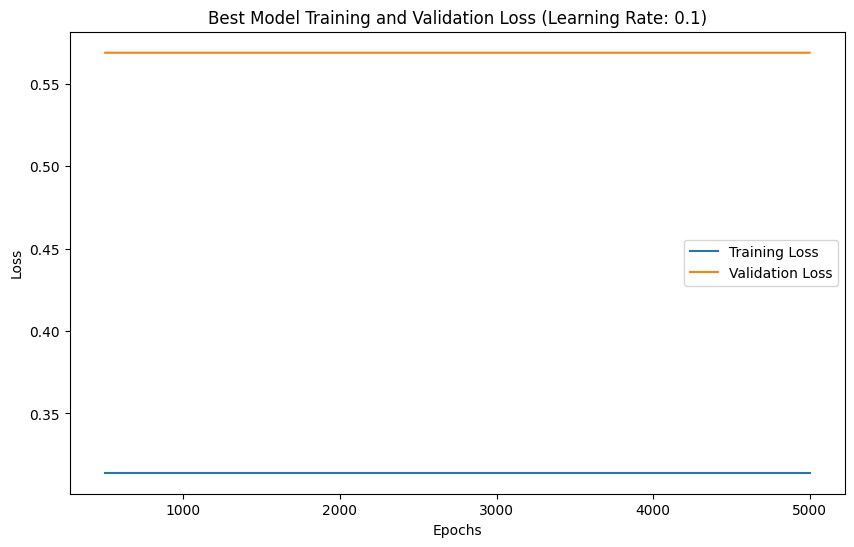

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import torch
from torch import optim
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Housing.csv')

# Separate features and target
X = df.drop(columns=['price'])
y = df['price'].values

# Identify categorical and numerical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply the preprocessing pipeline
X = preprocessor.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the target variable
target_scaler = StandardScaler()
y_train = target_scaler.fit_transform(y_train.reshape(-1, 1))
y_val = target_scaler.transform(y_val.reshape(-1, 1))

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)

# Define the linear regression model
class LinearRegressionModel(torch.nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

# Training loop
def train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, n_epochs=5000):
    training_losses = []
    validation_losses = []
    for epoch in range(n_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        if (epoch+1) % 500 == 0:
            model.eval()
            with torch.no_grad():
                val_outputs = model(X_val)
                val_loss = criterion(val_outputs, y_val)
            training_losses.append(loss.item())
            validation_losses.append(val_loss.item())
            print(f'Epoch [{epoch+1}/{n_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')
    return training_losses, validation_losses

# Function to run training with different learning rates
def run_training_with_learning_rate(learning_rate):
    print(f"\nTraining with learning rate: {learning_rate}")
    model = LinearRegressionModel(input_dim)
    criterion = torch.nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    training_losses, validation_losses = train_model(model, criterion, optimizer, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, n_epochs=5000)
    return model, training_losses, validation_losses

# Exploring different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
models_losses = {}

for lr in learning_rates:
    model, training_losses, validation_losses = run_training_with_learning_rate(lr)
    models_losses[lr] = (model, training_losses, validation_losses)

# Identify the best model based on validation loss
best_lr = min(learning_rates, key=lambda lr: models_losses[lr][2][-1])
best_model, best_training_losses, best_validation_losses = models_losses[best_lr]

print(f"\nBest learning rate: {best_lr}")

# Plot the results for the best model
epochs = range(500, 5001, 500)
plt.figure(figsize=(10, 6))
plt.plot(epochs, best_training_losses, label='Training Loss')
plt.plot(epochs, best_validation_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Best Model Training and Validation Loss (Learning Rate: {best_lr})')
plt.legend()
plt.show()
